# Case - Modelo de regressão para uma agência de publicidade

## Introdução

Uma empresa está investindo mensalmente em plataformas de publicidade online como Youtube, Facebook e Newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para entender melhor a relação entre as variáveis presentes nesses registros e
identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados.

## Objetivo do projeto

Criar um modelo de predição para estimar o retorno em vendas que pode ser gerado a partir de determinados investimentos em cada uma das modalidades de publicidade.

## Entendendo a base de dados

A base de dados contém informações dos investimentos feitos em publicidades no Youtube, Facebook, Newspaper e também as vendas geradas a partir de tais investimentos.

## Análise Descritiva

Primeiro, importou-se a base de dados disponiblizada para visualizar-se como estão dispostos os dados em cada uma das colunas do dataset.

In [ ]:
import pandas as pd

base_mkt = pd.read_csv('/content/MKT.csv')
base_mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


Tem-se então os dados de investimentos feitos para cada uma das modalidades de publicidade e o retorno em vendas que os respectivos investimentos renderam.

Avalia-se as informações do dataset de forma mais aprofundada utilizando-se da função info( ), buscando possíveis dados ausentes e também avaliando os tipos de dados de cada coluna.

In [ ]:
base_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Portanto, se trata de uma base de dados com 171 linhas, ou entradas, sendo que nenhuma das colunas apresenta dados ausentes (todas elas tem as 171 linhas preenchidas com dados não nulos). Outro aspecto importante a se avaliar é que o tipo de dados de todas é coerente ao tipo de informação que elas apresentam. Todas tem dados numéricas do tipo "float", números decimais, pois representam o valor em investimento, além da coluna de vendas.

Avaliando as estatísticas descritivas de cada coluna,

In [ ]:
base_mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


É possível observar que em nenhuma das colunas com variáveis descritivas (youtube, facebook, newspaper) o desvio padrão 'std' é maior que a respectiva média dos valores 'mean'. Isto indica que os dados estão relativamente aglomerados em um intervalo mais específico de valores, teremos poucos outliers.

Avaliando estas informações de forma mais visual, plotou-se gráficos do tipo histograma e boxplot com cada uma das variáveis descritivas. Para tal, utilizou-se da biblioteca Plotly com boxplot e Seaborn com histplot.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
px.box(base_mkt, x = 'youtube')

In [ ]:
px.box(base_mkt, x = 'facebook')

In [ ]:
px.box(base_mkt, x = 'newspaper')

In [ ]:
import seaborn as sns

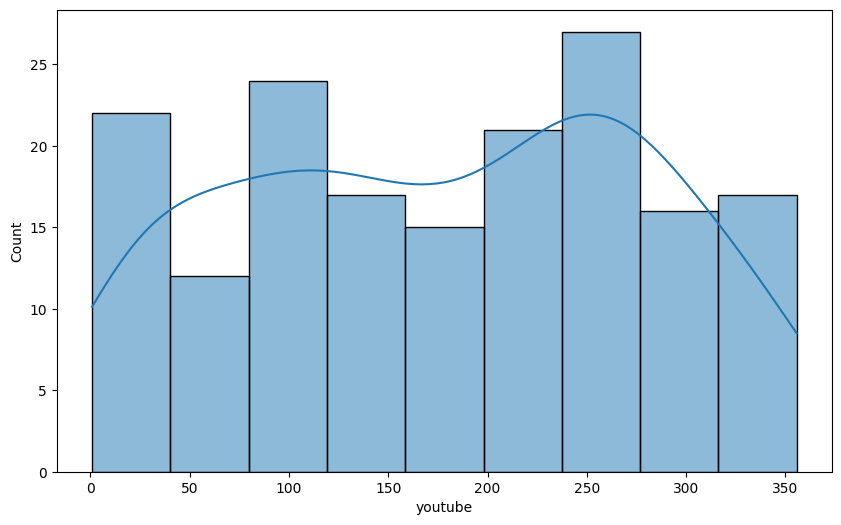

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(base_mkt, x = 'youtube', kde = True);

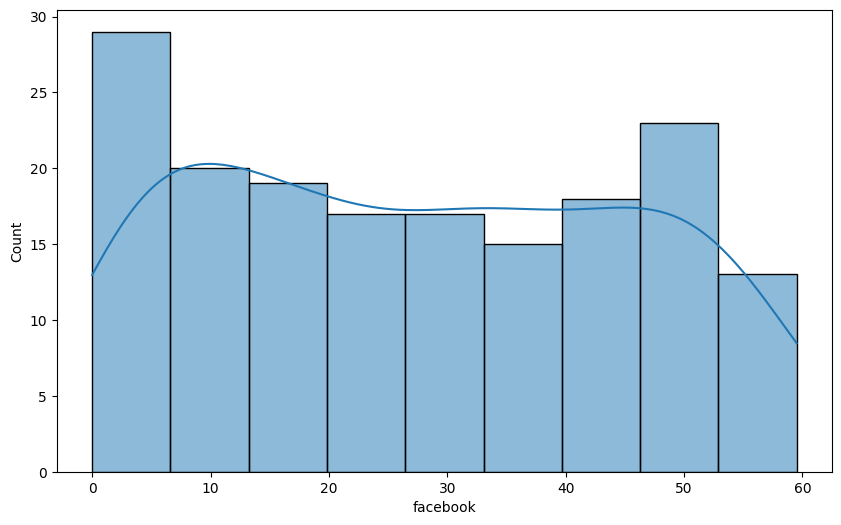

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(base_mkt, x = 'facebook', kde = True);

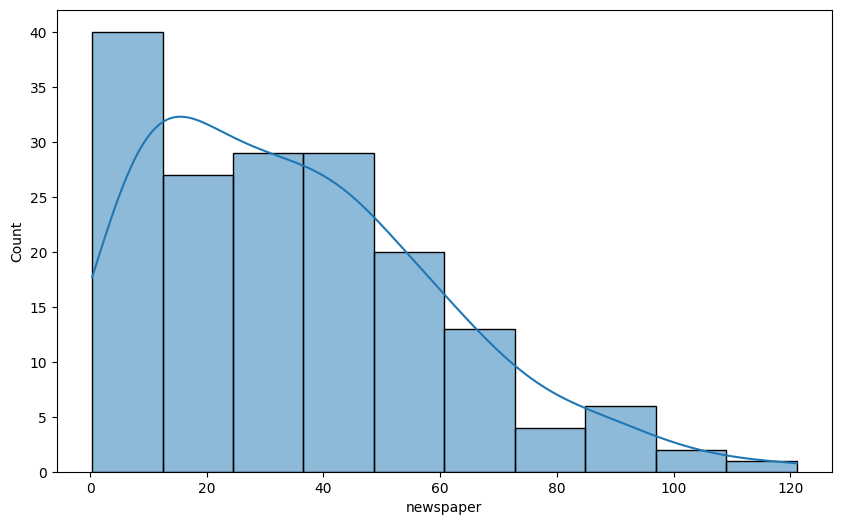

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(base_mkt, x = 'newspaper', kde = True);

Observando-se os dados acima dispostos nos gráficos, percebe-se que tanto para a coluna 'youtube' quanto para a coluna 'facebook' os dados estão bem distribuídos dentro dos seus respectivos intervalos de valores mínimos e máximos. Contudo, observando o boxplot e o histrograma da coluna 'newspaper' já percebe-se uma maior quantidade de dados de investimento até 50, com pouquíssimos valores na faixa de 80 até 120.

## Análise Exploratória

Agora, avaliou-se quais as correlações de cada uma das variáveis descritivas com a variável Target -> 'sales'. Para tal, analiou-se a matriz de correlação abaixo.

In [ ]:
base_mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


Outra forma de usar esta matriz de correlação, é plotando um mapa de calor com base nesta matriz, conforme segue abaixo.

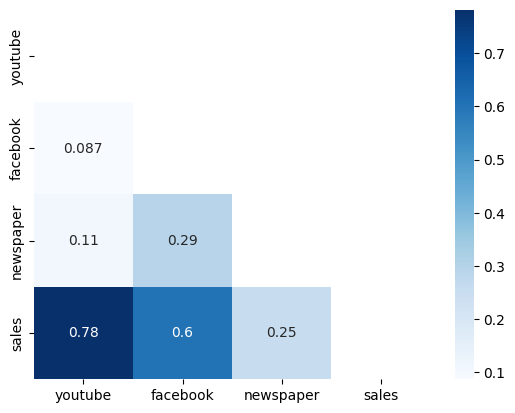

In [ ]:
# atribuindo a matriz de correlação a uma variável
matriz_correlacao = base_mkt.corr()

# máscara para ocultar do mapa de calor os valores iguais a um e valores repetidos
import numpy as np

mask = np.zeros_like(matriz_correlacao)
mask[np.triu_indices_from(mask)] = True

# plotando o mapa de calor
sns.heatmap(
    data = matriz_correlacao,
    annot = True,
    mask = mask,
    cmap = 'Blues'
);

Observa-se que todas as variáveis descritivas apresentam relações positivas com a variável target, ou seja, são diretamente proporcionais. Outro ponto importante é que a relação mais forte para se torno um retorno em vendas se dá com os investimentos em campanhas no youtube, seguido do facebook e por último as campanhas em newspaper.

Para avaliar estes pontos em forma de gráfico, utilizou-se da função pairplot( ), da biblioteca Seaborn, plotando apenas os gráficos relacionados a variável Target 'sales'.

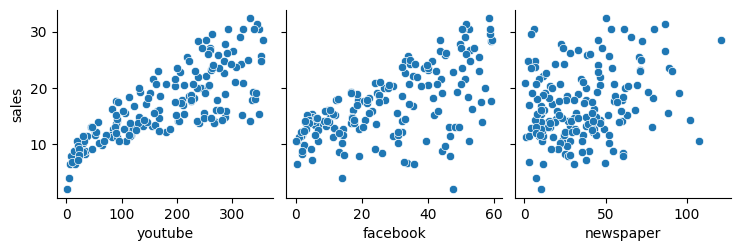

In [ ]:
sns.pairplot(base_mkt, x_vars = ['youtube', 'facebook', 'newspaper'], y_vars = 'sales');

Avaliando-se os gráficos acima fica ainda mais claro as correlações de cada uma das variáveis com o 'Target'. Observe que no gráfico do youtube, é possível visualizar uma reta crescente com os dados, indicando uma forte relação positiva entre as variáveis, sendo que nos demais os dados vão ficando mais dispersos conforme o grau de correlação diminui.

## Modelo

Com as análises acima descritas, já é possível partir para a confecção do modelo de machine learning. Para fazer tal modelo, primeiro é necessário separar as variáveis descritivas da variável target que precisa-se prever.

In [ ]:
X = base_mkt.drop(columns = 'sales')
y = base_mkt['sales']

Agora, importou-se da biblioteca sklearn.model_selection a função train_test_split( ) para separar as bases de treio e teste. Utilizou-se 20% da base para teste, sendo os outros 80% para treinar o modelo.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Separadas as bases, podemos treinar o modelo. Para isto, importamos da biblioteca sklearn.linear_model a função de regressão linear LinearRegression( )

In [ ]:
from sklearn.linear_model import LinearRegression

Atribúi-se a função a uma variável,

In [ ]:
lr = LinearRegression()

Treinando o modelo com a base de treino separada anteriormente,

In [ ]:
lrmodel = lr.fit(X_train, y_train)

## Calculando a predição

Agora, utilizando o modelo treinado, calcula-se os valores de venda da nossa base de teste.

In [ ]:
y_pred = lrmodel.predict(X_test)

Importou-se da biblioteca sklearn.metrics a função r2_score, para comparar os resultados previstos pelo modelo e o "gabarito", a base y_test.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('r_quadrado =', r2)

r_quadrado = 0.872863085701216


Temos um r_quadrado de 0.87 ou 87%. Isto quer dizer que tem-se uma linearidade muito alta dentro deste modelo, ou seja, em 87% dos casos, quando as variáveis descritivas mudarem, o valor de retorno em vendas irá mudar conforme previsto pelo modelo. Portanto, o modelo consegue sim predizer bem quais seram os valores de vendas a partir dos investimentos em campanhas de publicidade para cada uma das modalidades (youtube, facebook, newspaper).

Como insights final, pode-se destacar novamente a forte relação entre campanhas anunciadas no youtube, facebook e o retorno em vendas. Caso seja necessário, no futuro, priorizar investimentos, é recomendado focar nestas duas plataformas online em detrimento de campanhas anunciadas em newspaper.